In [ ]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
base_dir = "/kaggle/input/animal-classification/dataset"

In [3]:
tr_elephant_dir = os.path.join(base_dir , 'Training','Elephant')
val_elephant_dir = os.path.join(base_dir , 'Validation','Elephant')

print('total traning Elephant images:', len(os.listdir(tr_elephant_dir)))
print('total validation Elephant images:', len(os.listdir(val_elephant_dir)))

total traning Elephant images: 106
total validation Elephant images: 27


In [5]:
TRAINING_DIR = "/kaggle/input/animal-classification/dataset/Training"
VALIDATION_DIR = "/kaggle/input/animal-classification/dataset/Validation"

In [6]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                                rotation_range=40,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                horizontal_flip=True,
                                                                fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                    batch_size=8,
                                                    class_mode="categorical",
                                                    target_size=(224 , 224),
                                                    shuffle=True,
                                                    color_mode='rgb')

validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                              batch_size=8,
                                                              class_mode='categorical',
                                                              target_size=(224, 224))

Found 1549 images belonging to 15 classes.
Found 395 images belonging to 15 classes.


In [7]:
import urllib.request

In [8]:
url = 'https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
file_name = 'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [9]:
urllib.request.urlretrieve(url, file_name)
print("Download complete.")

Download complete.


In [10]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
INCEPTION_WEIGHTS_FILE = "/kaggle/working/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [12]:
pre_trained_model = InceptionV3(
    input_shape = (224,224,3),
    include_top = False,
    weights = None
)

pre_trained_model.load_weights(INCEPTION_WEIGHTS_FILE)

In [13]:
for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [14]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [16]:
last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output
last_output

<KerasTensor shape=(None, 12, 12, 768), dtype=float32, sparse=False, name=keras_tensor_539>

In [17]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Dense(512 , activation="relu")(x)
x = tf.keras.layers.Dense(256 , activation="relu")(x)
x = tf.keras.layers.Dense(128 , activation="relu")(x)
x = tf.keras.layers.Dense(64 , activation="relu")(x)
x = tf.keras.layers.Dense(32 , activation="relu")(x)
x = tf.keras.layers.Dense(15 , activation="softmax")(x)

In [25]:
model = tf.keras.Model(pre_trained_model.input , x)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_94 (Conv2D)  │ (None, 111, 111,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 111, 111,  │         96 │ conv2d_94[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_94       │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_95 (Conv2D)  │ (None, 109, 109,  │      9,216 │ activation_94[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_95[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_95       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_96 (Conv2D)  │ (None, 109, 109,  │     18,432 │ activation_95[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_96[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_96       │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 54, 54,    │          0 │ activation_96[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_97 (Conv2D)  │ (None, 54, 54,    │      5,120 │ max_pooling2d_4[… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_97[0][0]   │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_97       │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_98 (Conv2D)  │ (None, 52, 52,    │    138,240 │ activation_97[0]… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_98[0][0]   │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_98       │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 9,544,047 (36.41 MB)

 Trainable params: 568,783 (2.17 MB)

 Non-trainable params: 8,975,264 (34.24 MB)

In [26]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self , epoch , logs={}):
        if(logs.get("accuracy") > 0.98):
            print("\n 98% Accuracy Reached....Terminating Training!!!")
            self.model.stop_training = True

In [27]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

In [28]:
model.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = CategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [29]:
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 9,544,047 total parameters in this model.
There are 568,783 trainable parameters in this model.


In [30]:
callback = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 500,
                    callbacks=callback)

Epoch 1/500


I0000 00:00:1753860618.841758     120 service.cc:148] XLA service 0x78a2d80023a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753860618.843504     120 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753860618.843528     120 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753860620.526125     120 cuda_dnn.cc:529] Loaded cuDNN version 90300


  3/194 ━━━━━━━━━━━━━━━━━━━━ 15s 79ms/step - accuracy: 0.0486 - loss: 2.7037     

I0000 00:00:1753860626.149957     120 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


194/194 ━━━━━━━━━━━━━━━━━━━━ 56s 201ms/step - accuracy: 0.1716 - loss: 2.5231 - val_accuracy: 0.7215 - val_loss: 0.8936
Epoch 2/500
194/194 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.6801 - loss: 0.9715 - val_accuracy: 0.8608 - val_loss: 0.4564
Epoch 3/500
194/194 ━━━━━━━━━━━━━━━━━━━━ 20s 103ms/step - accuracy: 0.8188 - loss: 0.5543 - val_accuracy: 0.8810 - val_loss: 0.3803
Epoch 4/500
194/194 ━━━━━━━━━━━━━━━━━━━━ 20s 101ms/step - accuracy: 0.8375 - loss: 0.4454 - val_accuracy: 0.8911 - val_loss: 0.4066
Epoch 5/500
194/194 ━━━━━━━━━━━━━━━━━━━━ 19s 100ms/step - accuracy: 0.8967 - loss: 0.3453 - val_accuracy: 0.9241 - val_loss: 0.2068
Epoch 6/500
194/194 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.8761 - loss: 0.3799 - val_accuracy: 0.9291 - val_loss: 0.1909
Epoch 7/500
194/194 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.8968 - loss: 0.2924 - val_accuracy: 0.9114 - val_loss: 0.3119
Epoch 8/500
194/194 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.9112 - loss: 0.271

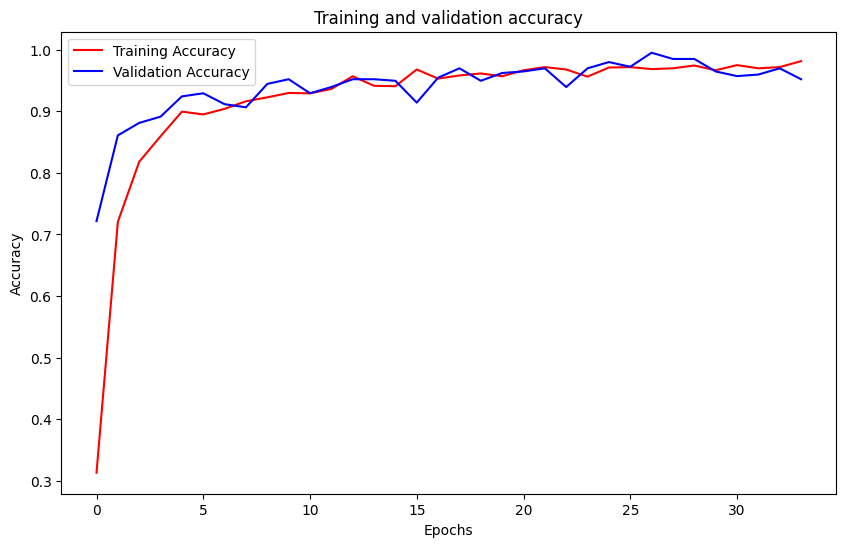

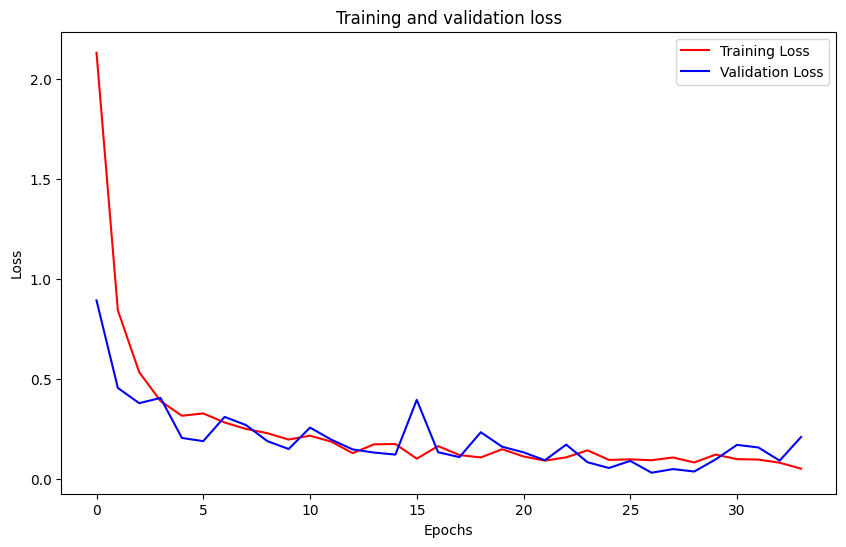

In [31]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) 
plt.figure(figsize=(10, 6)) 
plt.plot(epochs, acc, 'r', label="Training Accuracy") 
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy") 
plt.title('Training and validation accuracy')
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("")

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss") 
plt.title('Training and validation loss')
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.legend() 
plt.show()

In [32]:
print("Final training Loss",history.history['loss'][-1])
print("Final training Accuracy",history.history['accuracy'][-1] * 100,"%")
print("Final validation Loss",history.history['val_loss'][-1])
print("Final validation Accuracy",history.history['val_accuracy'][-1] * 100,"%")

Final training Loss 0.05330982059240341
Final training Accuracy 98.12782406806946 %
Final validation Loss 0.21156220138072968
Final validation Accuracy 95.18987536430359 %


In [33]:
model.save("animal_classification_inceptionV3_model.h5")